In [1]:
# Importera Pandas biblioteket
import pandas as pd

# OBS! Vi använder Pandas enkla inbyggda .plot funktion i den här koden istället för att importera Matplotlib

In [2]:
# Skapa en DataFrame och läs in försäljningsdatafilen i den
# OBS! Ändra namnet på filen som läses in!
df_sales = pd.read_csv('SumUp-SalesReport_7.7.2023-13.8.2023.csv')

In [3]:
# Formatera kolumner
df_sales['Date'] = pd.to_datetime(df_sales['Date']) # -> datetime datatyp
df_sales['Weekday'] = df_sales['Date'].dt.weekday # skapa en kolumn för veckodag
df_sales['Date'] = df_sales['Date'].dt.strftime('%Y-%m-%d') # -> samma format för varje rad

In [4]:
# Skapa pivottabeller
# 1. total försäljning per dag
sales_pivot = df_sales.pivot_table(
    values='Price (Gross)',
    index='Date',
    aggfunc='sum'
).reset_index()

# 2. total försäljning per veckodag
sales_pivot_weekday = df_sales.pivot_table(
    values='Price (Gross)',
    index=['Weekday', 'Date'],
    aggfunc='sum'
).reset_index()

<Axes: title={'center': 'Total försäljning per öppen dag, 2023'}, xlabel='Datum', ylabel='Total försäljning (€)'>

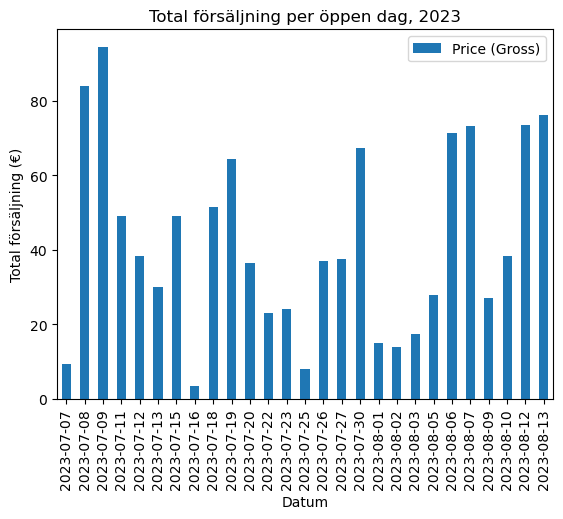

In [5]:
# Visualisera tabellen som ett stapeldiagram
sales_pivot.plot(x='Date', y='Price (Gross)', title='Total försäljning per öppen dag, 2023', xlabel='Datum', ylabel='Total försäljning (€)', kind='bar')

In [6]:
# Visa deskriptiv statistik (datapunkter, medelvärde, standardavvikelse, minimivärde, maximivärde och kvartiler)
sales_pivot.describe().map("{0:.2f}".format)

,Price (Gross)
count,27.00
mean,42.30
std,25.59
min,3.50
25%,23.62
50%,37.50
75%,66.00
max,94.50


In [7]:
# Visa deskriptiv statistik för veckodagar (datapunkter, medelvärde, standardavvikelse, minimivärde, maximivärde och kvartiler)
display_table = sales_pivot_weekday.groupby('Weekday')['Price (Gross)'].describe()

In [8]:
# Namnge tabell, index och kolumner och visa tabellen
display_table.index = ['Måndag', 'Tisdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lördag', 'Söndag']
display_table.rename(columns={'count': 'Antal värden', 
                              'mean': 'Medelvärde (€)', 
                              'std': 'Standardavvikelse (€)', 
                              'min': 'Minimivärde (€)', 
                              '25%': '25% kvartil (€)', 
                              '50%': '50% kvartil (€)', 
                              '75%': '75% kvartil (€)', 
                              'max': 'Maximivärde (€)'}, inplace=True)
display_table.style.format("{:.2f}").set_caption('Deskriptiv statistik för veckodagar, 2023')

,Antal värden,Medelvärde (€),Standardavvikelse (€),Minimivärde (€),25% kvartil (€),50% kvartil (€),75% kvartil (€),Maximivärde (€)
Måndag,1.00,73.25,nan,73.25,73.25,73.25,73.25,73.25
Tisdag,4.00,30.88,22.58,8.00,13.25,32.00,49.62,51.50
Onsdag,5.00,36.20,18.60,14.00,27.00,37.00,38.50,64.50
Torsdag,5.00,31.95,8.71,17.50,30.00,36.50,37.50,38.25
Fredag,1.00,9.50,nan,9.50,9.50,9.50,9.50,9.50
Lördag,5.00,51.50,26.98,23.00,28.00,49.00,73.50,84.00
Söndag,6.00,56.25,34.72,3.50,35.06,69.50,75.06,94.50
